In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from sklearn.metrics import accuracy_score

In [2]:
train_label=pd.read_csv("butterfly dataset\Training_set.csv")
test_label=pd.read_csv("butterfly dataset\Testing_set.csv")
test_l= test_label

In [3]:
train_label.head(5)

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART


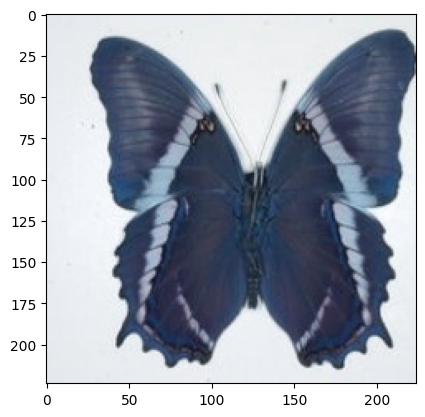

In [4]:
direct="butterfly dataset/train/"
img_no="Image_3.jpg"
img=cv2.imread(direct+img_no)
img=Image.fromarray(img,"RGB")
plt.imshow(np.array(img))

In [5]:
butterfly_list=list(train_label["label"].unique())
butterfly_list

['SOUTHERN DOGFACE',
 'ADONIS',
 'BROWN SIPROETA',
 'MONARCH',
 'GREEN CELLED CATTLEHEART',
 'CAIRNS BIRDWING',
 'EASTERN DAPPLE WHITE',
 'RED POSTMAN',
 'MANGROVE SKIPPER',
 'BLACK HAIRSTREAK',
 'CABBAGE WHITE',
 'RED ADMIRAL',
 'PAINTED LADY',
 'PAPER KITE',
 'SOOTYWING',
 'PINE WHITE',
 'PEACOCK',
 'CHECQUERED SKIPPER',
 'JULIA',
 'COMMON WOOD-NYMPH',
 'BLUE MORPHO',
 'CLOUDED SULPHUR',
 'STRAITED QUEEN',
 'ORANGE OAKLEAF',
 'PURPLISH COPPER',
 'ATALA',
 'IPHICLUS SISTER',
 'DANAID EGGFLY',
 'LARGE MARBLE',
 'PIPEVINE SWALLOW',
 'BLUE SPOTTED CROW',
 'RED CRACKER',
 'QUESTION MARK',
 'CRIMSON PATCH',
 'BANDED PEACOCK',
 'SCARCE SWALLOW',
 'COPPER TAIL',
 'GREAT JAY',
 'INDRA SWALLOW',
 'VICEROY',
 'MALACHITE',
 'APPOLLO',
 'TWO BARRED FLASHER',
 'MOURNING CLOAK',
 'TROPICAL LEAFWING',
 'POPINJAY',
 'ORANGE TIP',
 'GOLD BANDED',
 'BECKERS WHITE',
 'RED SPOTTED PURPLE',
 'MILBERTS TORTOISESHELL',
 'SILVER SPOT SKIPPER',
 'AMERICAN SNOOT',
 'AN 88',
 'ULYSES',
 'COMMON BANDED AWL',
 'C

In [6]:
train= "butterfly dataset/train/"
test = "butterfly dataset/test/"

In [7]:
def preprocess(image_directory, image_name, size=128) :
    image = cv2.imread(image_directory + image_name)
    image = Image.fromarray(image, 'RGB')
    image = image.resize((size, size))
    return np.array(image)

In [8]:
train_data=[]
train_labels =[]

In [9]:
for it in butterfly_list :
    data_curr_butterfly = train_label[train_label['label'] == it]
    curr_filenames = list(data_curr_butterfly['filename'])
    curr_labels = list(data_curr_butterfly['label'])
    for itr_no in range(len(curr_filenames)) :
        curr_image = preprocess(image_directory=train, image_name=curr_filenames[itr_no])
        curr_label = curr_labels[itr_no]
        train_data.append(curr_image)
        train_labels.append(butterfly_list.index(curr_label))

In [10]:
train_data=np.array(train_data)
train_labels=np.array(train_labels)

SOUTHERN DOGFACE


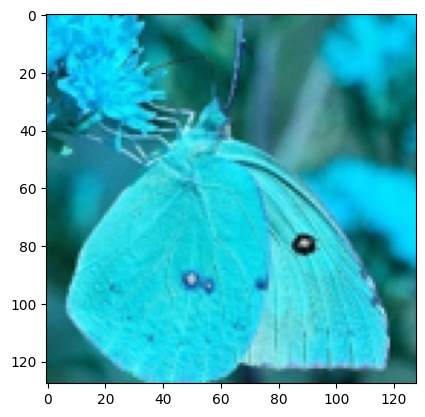

In [11]:
print(butterfly_list[train_labels[3]])
plt.imshow(train_data[3])

In [12]:
train_data=train_data/255

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten
from keras.constraints import max_norm
from keras.optimizers import SGD
from keras.utils import to_categorical

In [14]:
train_labels = to_categorical(train_labels)

In [15]:
classes=train_labels[0].shape[0]
classes

75

In [16]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=train_data[0].shape,activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(150,activation="relu"))
# model.add(Dropout(0.2))
model.add(Dense(100,activation="relu"))
# model.add(Dropout(0.2))
model.add(Dense(classes,activation="softmax")) #75 butterfly classes

In [18]:
epochs=20
lrate=0.01
decay=lrate/epochs
sgd =SGD(learning_rate=lrate, momentum=0.9, nesterov=False)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(model.summary())
history = model.fit(train_data, train_labels, epochs=20, batch_size=100)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                        

In [19]:
def visualize(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    
    axs[0].plot(epochs, acc, 'r', label='Training acc')
    axs[0].plot(epochs, val_acc, 'b', label='Validation acc')
    axs[0].set_title('Training and validation accuracy')
    axs[0].legend()
    axs[0].grid(True)
    
    axs[1].plot(epochs, loss, 'r', label='Training loss')
    axs[1].plot(epochs, val_loss, 'b', label='Validation loss')
    axs[1].set_title('Training and validation loss')
    axs[1].legend()
    axs[1].grid(True)
    
    plt.tight_layout()
    plt.show()


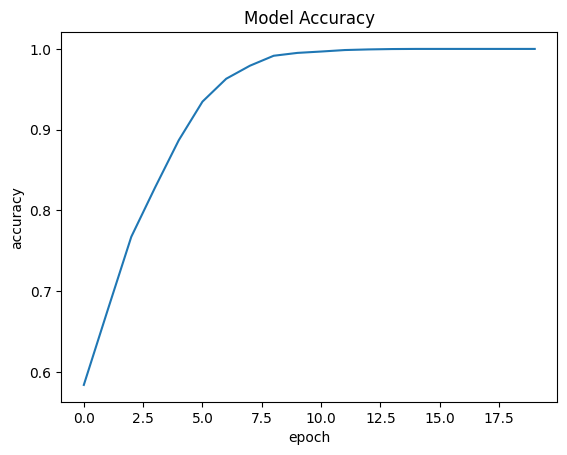

In [20]:
plt.plot(history.history["accuracy"])
plt.title("Model Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.show()

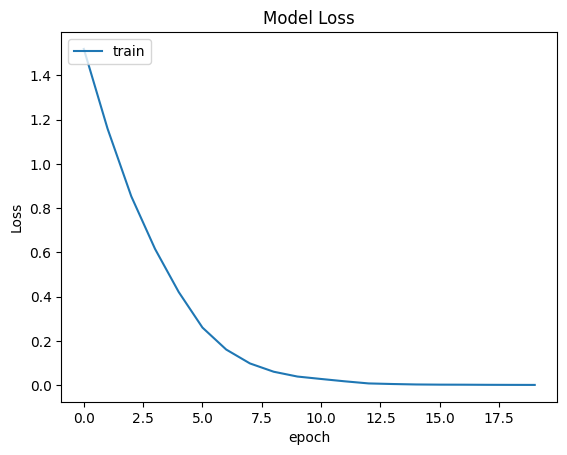

In [21]:
plt.plot(history.history["loss"])
# plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="upper left")
plt.show()

In [ ]:
result= []
for file_name in list(test_label['filename']) :
    curr_image = preprocess(image_directory=test, image_name=file_name)
    result.append(butterfly_list[np.argmax(model.predict(np.expand_dims(preprocess(image_directory=test, image_name=file_name), axis=0)))])

1/1 [==============================] - 0s 16ms/step


In [ ]:
test_label["label"]=result
test_label.head(10)

,filename,label
0,Image_1.jpg,PINE WHITE
1,Image_2.jpg,CRIMSON PATCH
2,Image_3.jpg,ADONIS
3,Image_4.jpg,IPHICLUS SISTER
4,Image_5.jpg,MILBERTS TORTOISESHELL
5,Image_6.jpg,SOUTHERN DOGFACE
6,Image_7.jpg,PAPER KITE
7,Image_8.jpg,INDRA SWALLOW
8,Image_9.jpg,PAPER KITE
9,Image_10.jpg,ZEBRA LONG WING


IPHICLUS SISTER


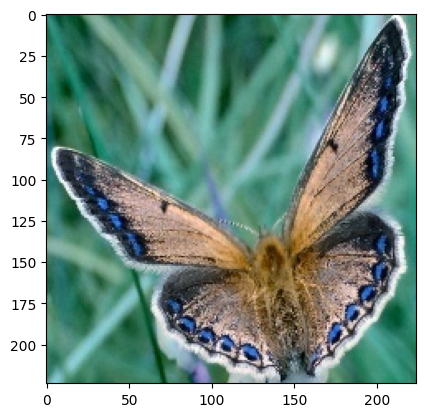

In [ ]:
direct="butterfly dataset/test/"
img_no="Image_3.jpg"
img=cv2.imread(direct+img_no)
img=Image.fromarray(img,"RGB")
plt.imshow(np.array(img))
print(test_label.label[3])

In [ ]:
test_label.to_csv("Prediction.csv",index=False)

In [ ]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
